# Otoczka wypukła

In [220]:
import numpy as np
import pandas as pd
import math
from functools import cmp_to_key
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

In [221]:
def export_points(points,name):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.save(filename = name)

In [222]:
def export_points_otoczka(algo_points, points,name):
    vis = Visualizer()
    vis.add_point(points)
    vis.add_point(algo_points, color = "orange")
    vis.add_line_segment([(algo_points[i], algo_points[i+1]) for i in range(len(algo_points)-1)], color = "red")
    vis.add_line_segment([algo_points[-1], algo_points[0]], color = "red")
    vis.save(filename = name)


In [223]:
points_a = np.load('points_a.npy')
points_b = np.load('points_b.npy')
points_c = np.load('points_c.npy')
points_d = np.load('points_d.npy')

### Przykładowe zastosowanie narzędzia do wizualizacji

In [224]:
def draw_example_1():
    vis = Visualizer()

    # point = (x, y)
    points = [
        (-62.781083483620016, 9.295526540248986),
        (-10.543100198806997, -26.080520917553812),
        (-81.64932184252287, -74.42163273030921),
        (-36.297317058417946, -72.91194239793609),
        (37.795092197502356, 57.71110085986143),
        (62.511149567563905, -29.172821102708937),
        (21.82806671019955, 2.647377124715007),
        (-46.24539555503924, 42.65521594922478),
        (-77.92302295134137, -7.666110427206263),
        (25.85862324263843, 62.49564419388622),
        (-27.71649622636616, -67.33453457840331),
        (94.83039177581244, -55.52473300629532),
        (-26.29675918891381, -51.30150933048958),
        (-70.11654929355294, 16.723865705806816),
        (26.682887992598097, -65.55763984116587),
        (57.03377667841906, -55.56635171240132),
        (-16.053624841650247, -42.333295668531456),
        (-56.810858686395505, -37.41219002465095),
        (15.604076302407279, -24.85779870929437),
        (-71.77261869976445, -12.306083264402673),
    ]
    # line_segment = ((x1, y1), (x2, y2))
    line_segments = [
        ((-81.64932184252287, -74.42163273030921), (-36.297317058417946, -72.91194239793609)),
        ((-36.297317058417946, -72.91194239793609), (26.682887992598097, -65.55763984116587)),
        ((26.682887992598097, -65.55763984116587), (94.83039177581244, -55.52473300629532)),
        ((94.83039177581244, -55.52473300629532), (37.795092197502356, 57.71110085986143)),
        ((37.795092197502356, 57.71110085986143), (25.85862324263843, 62.49564419388622)),
        ((25.85862324263843, 62.49564419388622), (-46.24539555503924, 42.65521594922478)),
        ((-46.24539555503924, 42.65521594922478), (-70.11654929355294, 16.723865705806816)),
        ((-70.11654929355294, 16.723865705806816), (-77.92302295134137, -7.666110427206263)),
        ((-77.92302295134137, -7.666110427206263), (-81.64932184252287, -74.42163273030921)),
    ]
    vis.add_point(points, color="green")
    vis.add_line_segment(line_segments, color="blue")
    vis.show()

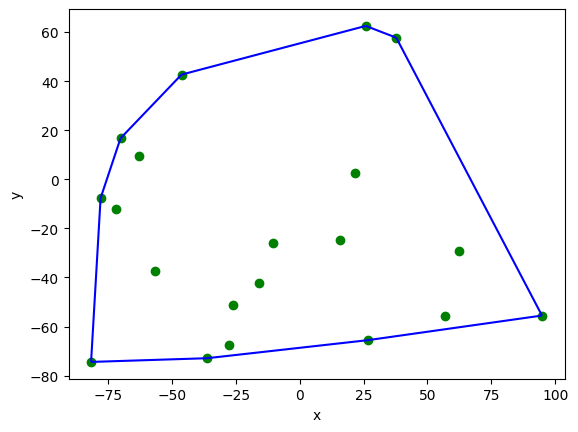

In [225]:
draw_example_1()

### Wprowadzenie

Czym jest otoczka wypukła?  
Podzbiór płaszczyzny $Q$ nazywamy wypukłym iff, gdy dla dowolnej pary punktów $p, q \in Q$ odcinek $\overline{pq}$ jest całkowicie zawarty w $Q$.  
Otoczka wypukła $\mathcal{CH}(Q)$ zbioru $Q$ jest najmniejszym wypukłym zbiorem zawierającym $Q$.

### Zastosowania otoczku wypukłej

Otoczki wypukłe - w szczególności otoczki wypukłe w przestrzeni trójwymiarowej - są spotykane w różnych zastosowaniach. Na przykład używa się ich do przyspieszania wykrywania kolizji w animacji komputerowej. Przepuśćmy, że chcemy sprawdzić, czy dwa obiekty $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się. Jeśli przez większość czasu odpowiedź na to pytanie jest negatywna, to opłaca się następująca strategia. Przybliżamy obiekty przez prostrze obiekty $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$, które zawierały orginały. Jeśli chcemy sprwadzić, czy $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się, najpierw sprawdzamy, czy przecinają się $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$. Jeśli występuje ten przypadek, to powinniśmy wykonać test na orginalnych obiektach, który jest przepuszczalnie znacznie kosztowniejszy.  
Sprawdzanie przecięcia otoczek wypukłych jest bardziej skomplikowane niż dla sfer - choć mimo to łatwiejsze niż dla obiektów niewypukłych - ale otoczki wypukłe mogą dużo lepiej przybliżać większość obiektów.

## Generowanie losowych punktów na płaszczyźnie 

Zapoznaliśmy się i wiemy jak generowac losowe punkty na płaszczyźnie z laboratorium I (współrzędne rzeczywiste typu *double* - podwójna precyzja obliczeń). Przygotuj zestawy punktów, które będzie można użyć jako testowe dla algorytmów obliczania otoczki wypukłej.

Uzupełnij funkcję ```generate_uniform_points```.

In [226]:
def generate_uniform_points(left=-100, right=100, n=100):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    return np.random.uniform(left, right, (n,2))

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x \in \langle -100,100 \rangle$ oraz $y \in \langle -100,100\rangle$.

In [227]:
#points_a = generate_uniform_points(-100, 100, 100)

Zwizualizuj wygenerowane punkty.

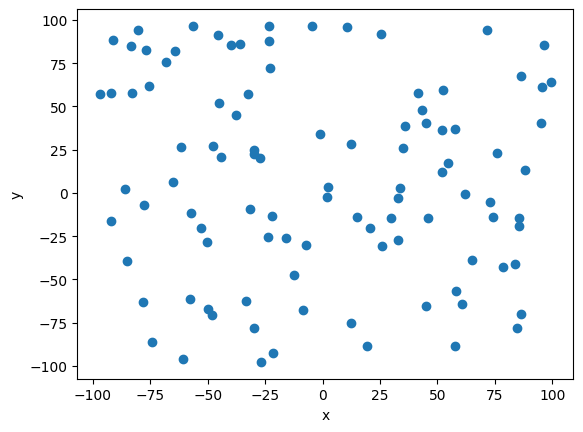

In [228]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()
export_points(points_a,"punkty_a")

Uzupełnij funkcję ```generate_circle_points```.

In [229]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    wyniki = []
    angles = np.random.uniform(0, 2*np.pi, n)
    x_center, y_center = O[0], O[1] #wyciagamy x-owa oraz y-kowa srodka okregu
    x = x_center + R * np.cos(angles) #tworzymy liste x-ow 
    y = y_center + R * np.sin(angles) #tworzymy liste y-kow
    #musimy zwrocic te punkty w krotkach rozlozone w miare rownomiernie na okregu
    for i in range(n):
        wyniki.append((x[i], y[i]))
    return wyniki

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $O = (0,0)$ i promieniu $R = 10$.

In [230]:
#points_b = generate_circle_points((0, 0), 10, 100)

Zwizualizuj wygenerowane punkty.

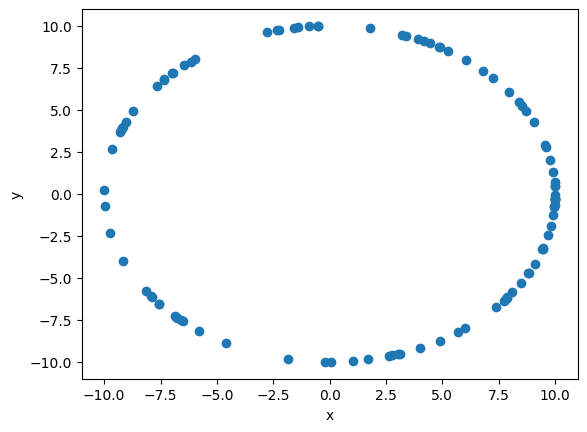

In [231]:
# visualize(points_b)
vis.clear()
vis.add_point(points_b)
vis.show()
export_points(points_b,"punkty_b")

Jak można było zauważyć, to funkcje ```generate_uniform_points``` oraz ```generate_circle_points``` są takie same jak w laboratorium I.

Uzupełnij funkcję ```generate_rectangle_points```.

In [232]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    Generates n points at random locations around the perimeter of a rectangle.
    
    :param a: Bottom-left vertex of the rectangle
    :param b: Bottom-right vertex of the rectangle
    :param c: Top-right vertex of the rectangle
    :param d: Top-left vertex of the rectangle
    :param n: Total number of points to generate
    :return: List of (x, y) tuples representing the points
    '''
    tab = [None for _ in range(n)]

    lewa, prawa = a[0], c[0]
    dol, gora = a[1], c[1]
    
    wysokosc = gora - dol  
    szerokosc = prawa - lewa 
    obwod = 2 * (szerokosc + wysokosc)
    
    
    for i in range(n):
        dist_from_a_ccw = np.random.random() * obwod #liczba od 0 do 1 pomnozona przez obwod
        
        if 0 <= dist_from_a_ccw < wysokosc:
            x = lewa
            y = gora - dist_from_a_ccw
        elif wysokosc <= dist_from_a_ccw < wysokosc + szerokosc:
            x = lewa + (dist_from_a_ccw - wysokosc)
            y = gora
        elif wysokosc + szerokosc <= dist_from_a_ccw < 2 * wysokosc + szerokosc:
            x = prawa
            y = gora - (dist_from_a_ccw - wysokosc - szerokosc)
        else:
            x = prawa - (dist_from_a_ccw - 2 * wysokosc - szerokosc)
            y = dol
        
        tab[i] = (x, y)
    
    return tab



<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na obwodzie prostokąta, którego wyznaczają wierzchołki
$(-10,-10), (10,-10), (10,10)$ oraz $(-10,10)$.

In [233]:
#points_c = generate_rectangle_points(
  #  (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

Zwizualizuj wygenerowane punkty.

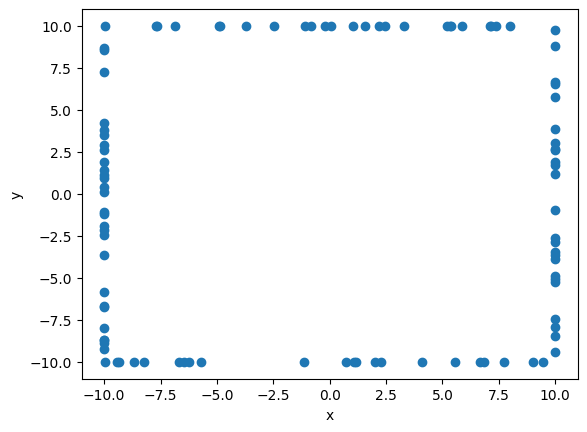

In [234]:
# visualize(points_c)
vis.clear()
vis.add_point(points_c)
vis.show()
export_points(points_c,"punkty_c")

Uzupełnij funkcję ```generate_square_points```.

In [235]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10), axis_n=25, diag_n=20):
    '''
    Funkcja generuje axis_n punktów na dwóch bokach kwadratu
    leżących na osiach x i y oraz diag_n punktów na
    przektąnych kwadratu, którego wyznaczają punkty
    a, b, c i d.
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param axis_n: ilość generowanych punktów na każdym
                   z dwóch boków kwadratu równoległych do osi x i y
    :param diag_n: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    tab=[]
    left,right=a[0],c[0]
    down,up=a[1],c[1]
    for p in [a,b,c,d]:
        tab.append(p)
    for i in range(axis_n):
        y=np.random.uniform(down,up)
        tab.append((left,y))
    for i in range(axis_n):
        x=np.random.uniform(left,right)
        tab.append((x,down))
    for i in range(diag_n):
        cord=np.random.uniform(left,right)
        tab.append((cord,cord))
    for i in range(diag_n):
        cord=np.random.uniform(left,right)
        tab.append((cord,(up-down)-cord))
    return tab

<span style="color:red">Ćw.</span> Wygeneruj losowe punktów w przestrzeni 2D w następujący sposób: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu, zawierający punkty wyznaczające kwadrat $(0, 0), (10, 0), (10, 10)$ oraz $(0, 10)$.

In [236]:
#points_d = generate_square_points(
#    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

Zwizualizuj wygenerowane punkty.

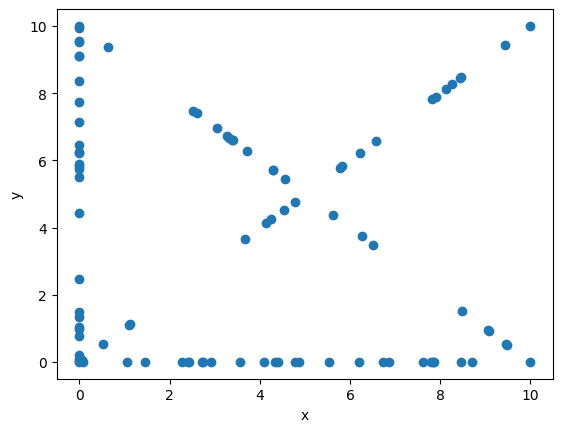

In [237]:
# visualize(points_d)
vis.clear()
vis.add_point(points_d)
vis.show()
export_points(points_d,"punkty_d")

In [238]:
np.save('points_a.npy', points_a)
np.save('points_b.npy', points_b)
np.save('points_c.npy', points_c)
np.save('points_d.npy', points_d)

## Algorytm Grahama oraz algorytm Jarvisa

Po przygotowaniu przykładowych zbiorów danych i ich zwizualizowaniu, chcemy zobaczyć jak buduje się dla nich otoczka wypukła z wykorzystaniem różnych algortymów.  
W tych dwóch algorytmach potrzebna będzie funkcja którą już dobrze znamy, czyli funkcja, która sprawdza po której stornie prostej znajduje się punkt.  
Dla każdego algorytmu trzeba będzie zaimplementować dwie funkcje obliczające otoczkę wypukłę, ze względu, że jedna z nich będzie miała możliwość wyświetlania kroków postępowania w algorytmie. Druga funkcja będzie uzyteczna do porównywania czasów dla różnych zbiorów danych i względęm algorytmów.  
W graficznej funkcji danego algorytmu, jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualne rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki, wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).  

### Algorytm Grahama

Algorytm Grahama tworzy otoczkę wypukłą poprzez utrzymywanie stosu $S$, w którym znajdują się punkty, które mogą, ale nie muszą tworzyć otoczki wypukłej. Za każdym razem jest wstawiany na stos (push) jeden punkt z zbioru punktów $Q$ i jest on usuwany ze stosu (pop), jeżeli nie jest punktem $\mathcal{CH}(Q)$. Kiedy algorytm kończy się, stos $S$ zawiera tylko punkty otoczki wypukłej $\mathcal{CH}(Q)$ w kierunku przeciwnym do ruchu wskazówek zegera.

---

Procedura $\mathtt{Graham-Build(Q)}$ przyjmuje zbiór punktów $Q$, gdzie $|Q| \geq 3$. Wywołuje ona funkcję $\mathtt{TOP(S)}$, która zwraca punkt z góry stosu bez zmieniania $S$ oraz
$\mathtt{NEXT-TO-TOP(S)}$, która zwraca punkt ponieżej góry stosu $S$, bez zmieniania stosu. Funkcja $\mathtt{PUSH(p, S)}$ wstawia punkt $p$ na stos $S$. Funkcja $\mathtt{POP(p, S)}$ usuwa punkt $p$ ze stosu $S$.

$\mathtt{Graham-Build(Q)}$  
1)  niech $p_0$ będzie punktem w zbiorze Q z najmniejszą współrzędną $y$,  
    oraz najmniejszą współrzędną $x$ w przypadku, gdy wiele punktów ma tą samą współrzędną $x$  
    
2)  nich $\mathtt{\langle p_1, p_2, \dots, p_m \rangle}$ będzie pozostałym zbiorem punktów w $Q$ posortowanym  
    zgodnie z przeciwnym ruchem wskazówek zegara wokół punktu $p_0$  
    (jeżeli więcej niż jeden punkt ma ten sam kąt to usuwamy wszystkie punkty  
     z wyjątkiem tego najbardziej oddalonego od $p_0$)  
3) stwórz pusty stos $S$  
4) $\mathtt{PUSH(p_0, S)}$
5) $\mathtt{PUSH(p_1, S)}$
6) $\mathtt{PUSH(p_2, S)}$
7) **for** $i = 3$ **to** m  
8) &emsp;**while** kąt utworzony przez $\mathtt{NEXT-TO-TOP(S)}$, $\mathtt{TOP(S)}$ oraz $p_i$ tworzy lewostronny skręt
9) &emsp;&emsp;$\mathtt{POP(S)}$
10) &emsp;$\mathtt{PUSH(p_i, S)}$
11) **return** $S$


---

Lewostronny skręt oznacza, że dla trzech kolejnych punktów $a, b, c$, punkt $b$ leży po lewej stronie prostej $ac$.  
  

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama.

In [239]:
def skret(p0, p1, p2):
    return (p1[0] - p0[0]) * (p2[1] - p0[1]) - (p1[1] - p0[1]) * (p2[0] - p0[0])

def minimum_y(Q):
    n = len(Q)
    mini_y = Q[0]
    for i in range(1, n):
        if Q[i][1] < mini_y[1] or (Q[i][1] == mini_y[1] and Q[i][0] < mini_y[0]):
            mini_y = Q[i]
    return mini_y

def sort_points(Q, O_point):
    def compare(a, b):
        det = (a[0] - O_point[0]) * (b[1] - O_point[1]) - (a[1] - O_point[1]) * (b[0] - O_point[0])
        if det > 0:
            return -1
        elif det < 0:
            return 1
        else:
            dist_a = (a[0] - O_point[0]) ** 2 + (a[1] - O_point[1]) ** 2
            dist_b = (b[0] - O_point[0]) ** 2 + (b[1] - O_point[1]) ** 2
            return -1 if dist_a < dist_b else 1 if dist_a > dist_b else 0
    
    sorted_points = sorted(Q, key=cmp_to_key(compare))
    return sorted_points

def graham_algorithm(Q):
    q = minimum_y(Q)
    T = sort_points(Q, q)
    n = len(T)

    if n < 3:
        return T

    S = [T[0], T[1], T[2]]

    for i in range(3, n):
        while len(S) >= 2 and skret(S[-2], S[-1], T[i]) <= 0:
            S.pop()
        S.append(T[i])
    
    return S


Przetestuj swoją implementacje algorytmu Grahama, by sprawdzić czy poprawnie obliczana jest otoczka.

In [240]:
Test().runtest(1, graham_algorithm)

Lab 2, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 1.469s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [241]:
def graham_algorithm_draw(Q):
    q = minimum_y(Q)               
    T = sort_points(Q, q)                       
    n = len(T)                    
    S = []  
    edges = []                     
    vis = Visualizer()              
    vis.add_point(Q)

    if n < 3:
        return T, vis
    else:
        for i in range(min(n, 3)):
            S.append(T[i])
            vis.add_point(S[-1], color="red")
        for i in range(2):
            ls = vis.add_line_segment([S[i], S[i + 1]], color="red")
            edges.append(ls)
        
        for i in range(3, n):
            while len(S) >= 2 and skret(S[-2], S[-1], T[i]) <= 0:
                vis.remove_figure(edges[-1])         
                vis.add_point(S[-1], color="blue")
                S.pop()
                edges.pop()
            S.append(T[i])
            vis.add_point(S[-1], color="orange")

            ls = vis.add_line_segment([S[-2], S[-1]], color="red")
            edges.append(ls)
        
        vis.add_line_segment([S[-1], S[0]], color="red")
        
        return S, vis


Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [242]:
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)

In [243]:
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)
print(len(graham_points_a))

15


In [306]:
vis_graham_a.show_gif(interval=200)
vis_graham_a.save_gif(filename='zbiorAgraham', interval=200)

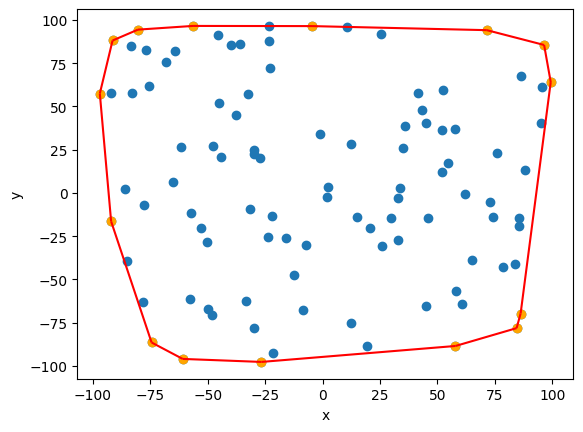

In [245]:
# visualize(graham_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_point(graham_points_a, color = "orange")
vis.add_line_segment([(graham_points_a[i], graham_points_a[i+1]) for i in range(len(graham_points_a)-1)], color = "red")
vis.add_line_segment([graham_points_a[-1], graham_points_a[0]], color = "red")
vis.show()

In [246]:
export_points_otoczka(graham_points_a, points_a, 'otoczka_zbiorA')

Zbiór danych B

In [247]:
graham_points_b, vis_graham_b = graham_algorithm_draw(points_b)
print(len(graham_points_b))


100


In [ ]:
vis_graham_b.show_gif()
vis_graham_b.save_gif(filename='zbiorBgraham', interval=200)

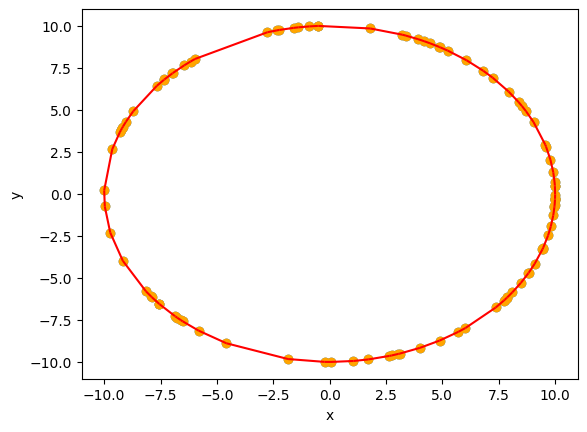

In [249]:
# visualize(graham_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_point(graham_points_b, color = "orange")
vis.add_line_segment([(graham_points_b[i], graham_points_b[i+1]) for i in range(len(graham_points_b)-1)], color = "red")
vis.add_line_segment([graham_points_b[-1], graham_points_b[0]], color = "red")
vis.show()
export_points(graham_points_b,"graham_points_b")

In [250]:
export_points_otoczka(graham_points_b, points_b, 'otoczka_zbiorB')

Zbiór danych C

In [251]:
graham_points_c, vis_graham_c = graham_algorithm_draw(points_c)
print(len(graham_points_c))

8


In [ ]:
vis_graham_c.show_gif()
vis_graham_c.save_gif(filename='zbiorCgraham', interval=200)

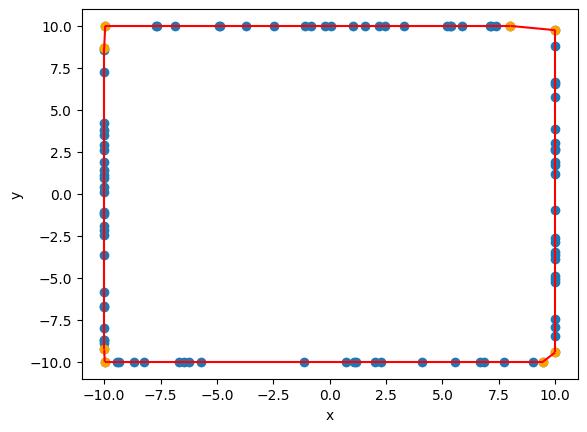

In [253]:
# visualize(graham_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_point(graham_points_c, color = "orange")
vis.add_line_segment([(graham_points_c[i], graham_points_c[i+1]) for i in range(len(graham_points_c)-1)], color = "red")
vis.add_line_segment([graham_points_c[-1], graham_points_c[0]], color = "red")
vis.show()

In [254]:
export_points_otoczka(graham_points_c, points_c, 'otoczka_zbiorC')

Zbiór danych D

In [255]:
graham_points_d, vis_graham_d = graham_algorithm_draw(points_d)
graham_points_d = graham_algorithm(points_d)
print(len(graham_points_d))

4


In [ ]:
vis_graham_d.show_gif()
vis_graham_d.save_gif(filename='zbiorDgraham', interval=200)

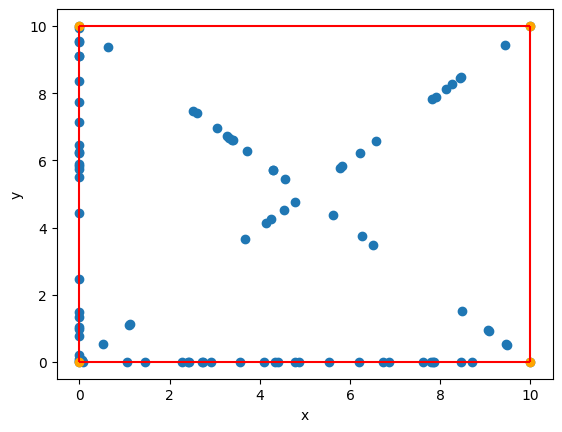

In [257]:
# visualize(graham_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_point(graham_points_d, color = "orange")
vis.add_line_segment([(graham_points_d[i], graham_points_d[i+1]) for i in range(len(graham_points_d)-1)], color = "red")
vis.add_line_segment([graham_points_d[-1], graham_points_d[0]], color = "red")
vis.show()

In [258]:
export_points_otoczka(graham_points_d, points_d, 'otoczka_zbiorD')

### Algorytm Jarvisa

Algorytm Jarvisa oblicza otoczkę wypukłą dla zbioru punktów $Q$ przez technikę zwaną owijaniem paczki (*package wrapping*) lub owijaniem prezentu (*gift wrapping*). Algorytm Jarvisa buduje sekwencję $H = \langle p_1, p_2, \dots, p_m \rangle$ będącą wierzchołkami $\mathcal{CH}(Q)$. Zaczynamy od punktu $p_0$, następny punkt $p_1$ w otoczce wypukłej ma najmniejszy kąt w odniesieniu do $p_0$ (w przypadku takiego samego kąta - wybiera się punkt najdalej od $p_0$). Podobnie, gdy $p_2$ ma najmniejszy kąt w odniesieniu do $p_1$, itd.. Zauważyć warto, że możemy tym sposobem obliczyć lewy i prawy łańcuch otoczki wypukłej $\mathcal{CH}(Q)$. Lewy łańcuch buduje się podobnie. Gdy osiągniemy najwyższy wierzchołej w prawym łańcuchu $p_k$, wybieramy wierzchołek $p_{k+1}$, który ma najmniejszy kąt w odniesieniu do $p_k$, ale od ujemnej osi-$x$. Można zaimplementować algorytm Jarvisa bez konstruowania pomocniczych łańcuchów - lewego i prawego. Taka implementacja utrzymuje śledzenie kąta ostatniej strony otoczki wypukłej i wymaga sekwencji kątów boków otoczki tylko rosnącej. (Patrząc na trzy ostatnie punkty jesteśmy w stanie obliczyć jaki punkt należy włączyć do $\mathcal{CH}(Q)$ w zależności od budowanego punktu)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa.

In [259]:
def minimum_y(Q):
    n = len(Q)
    mini_y = Q[0]
    for i in range(1, n):
        if Q[i][1] < mini_y[1] or (Q[i][1] == mini_y[1] and Q[i][0] < mini_y[0]):
            mini_y = Q[i]
    return mini_y

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2

def distance(p, q):
    return (p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2

def jarvis_algorithm(Q):
    if isinstance(Q, np.ndarray):
        Q = Q.tolist()
    n = len(Q)
    if n < 3:
        return Q

    hull = []

    l = Q.index(minimum_y(Q))

    p = l
    while True:
        hull.append(Q[p])
        q = (p + 1) % n
        for i in range(n):
            orient = orientation(Q[p], Q[i], Q[q])
            if orient == 2 or (orient == 0 and distance(Q[p], Q[i]) > distance(Q[p], Q[q])):
                q = i
        p = q
        if p == l:
            break

    return hull


Przetestuj swoją implementacje algorytmu Jarvisa, by sprawdzić czy poprawnie obliczana jest otoczka.

In [260]:
Test().runtest(2, jarvis_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 1.766s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa z dodatkową opcją wyświetlania kroków algorytmu.

In [261]:
import math
import numpy as np

def minimum_y(Q):
    n = len(Q)
    mini_y = Q[0]
    for i in range(1, n):
        if Q[i][1] < mini_y[1] or (Q[i][1] == mini_y[1] and Q[i][0] < mini_y[0]):
            mini_y = Q[i]
    return mini_y

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2

def distance(p, q):
    return (p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2

def jarvis_algorithm_draw(Q):
    if isinstance(Q, np.ndarray):
        Q = Q.tolist()
    
    n = len(Q)
    if n < 3:
        return Q, None

    hull = []
    vis = Visualizer()
    vis.add_point(Q)

    l = Q.index(minimum_y(Q))
    S = [Q[l]]
    vis.add_point(S[0], color="orange")

    p = l
    while True:
        hull.append(Q[p])
        q = (p + 1) % n
        for i in range(n):
            orient = orientation(Q[p], Q[i], Q[q])
            if orient == 2 or (orient == 0 and distance(Q[p], Q[i]) > distance(Q[p], Q[q])):
                q = i
        curr_point = Q[q]
        if not np.array_equal(curr_point, S[0]):
            vis.add_point(curr_point, color="orange")
            vis.add_line_segment((S[-1], curr_point), color="red")
            S.append(curr_point)
        else:
            vis.add_point(S[0], color="red")
            vis.add_line_segment((S[-1], S[0]), color="red")
            break
        p = q

    return hull, vis



Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [262]:
jarvis_points_a, vis_jarvis_a = jarvis_algorithm_draw(points_a)
print(len(jarvis_points_a))

15


In [ ]:
vis_jarvis_a.show_gif()
vis_jarvis_a.save_gif(filename='zbiorAJarvis', interval=200)

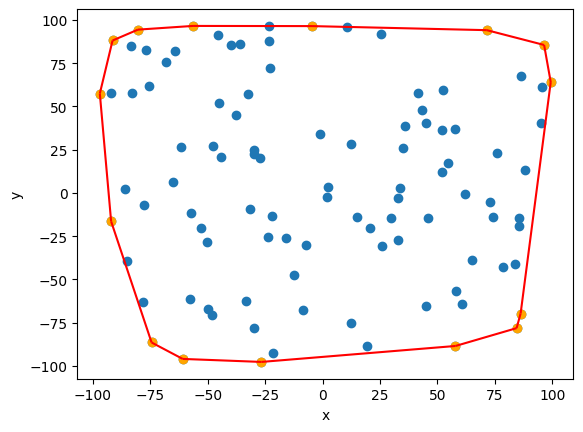

In [264]:
# visualize(jarvis_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_point(jarvis_points_a, color = "orange")
vis.add_line_segment([(jarvis_points_a[i], jarvis_points_a[i+1]) for i in range(len(jarvis_points_a)-1)], color = "red")
vis.add_line_segment([jarvis_points_a[-1], jarvis_points_a[0]], color = "red")
vis.show()

Zbiór danych B

In [265]:
jarvis_points_b, vis_jarvis_b = jarvis_algorithm_draw(points_b)
print(len(jarvis_points_b))

100


In [ ]:
vis_jarvis_b.show_gif()
vis_jarvis_b.save_gif(filename='zbiorBJarvis', interval=200)

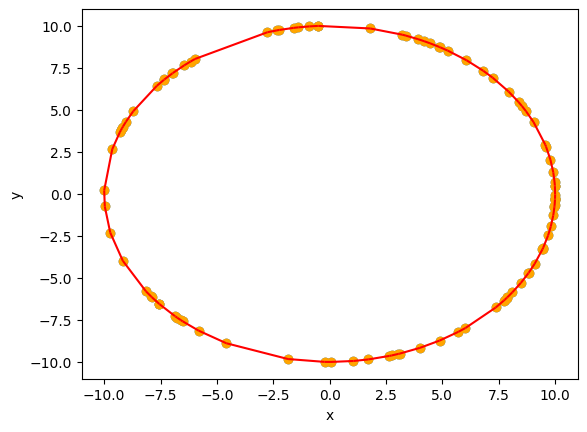

In [267]:
# visualize(jarvis_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_point(jarvis_points_b, color = "orange")
vis.add_line_segment([(jarvis_points_b[i], jarvis_points_b[i+1]) for i in range(len(jarvis_points_b)-1)], color = "red")
vis.add_line_segment([jarvis_points_b[-1], jarvis_points_b[0]], color = "red")
vis.show()

Zbiór danych C

In [268]:
jarvis_points_c, vis_jarvis_c = jarvis_algorithm_draw(points_c)
print(len(jarvis_points_c))

8


In [ ]:
vis_jarvis_c.show_gif()
vis_jarvis_c.save_gif(filename='zbiorCJarvis', interval=200)

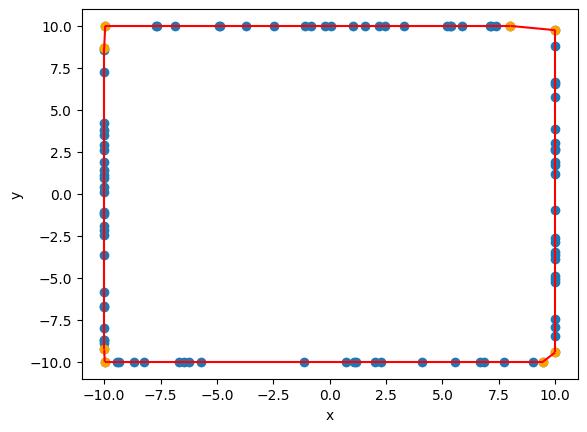

In [270]:
# visualize(jarvis_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_point(jarvis_points_c, color = "orange")
vis.add_line_segment([(jarvis_points_c[i], jarvis_points_c[i+1]) for i in range(len(jarvis_points_c)-1)], color = "red")
vis.add_line_segment([jarvis_points_c[-1], jarvis_points_c[0]], color = "red")
vis.show()

Zbiór danych D

In [271]:
jarvis_points_d, vis_jarvis_d = jarvis_algorithm_draw(points_d)
print(len(jarvis_points_d))

4


In [ ]:
vis_jarvis_d.show_gif()
vis_jarvis_d.save_gif(filename='zbiorDJarvis', interval=200)

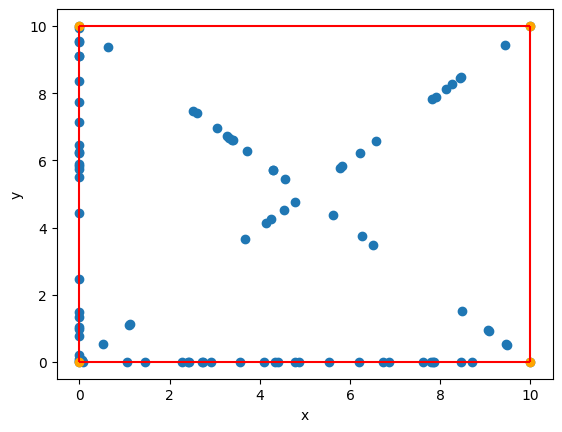

In [273]:
# visualize(jarvis_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_point(jarvis_points_d, color = "orange")
vis.add_line_segment([(jarvis_points_d[i], jarvis_points_d[i+1]) for i in range(len(jarvis_points_d)-1)], color = "red")
vis.add_line_segment([jarvis_points_d[-1], jarvis_points_d[0]], color = "red")
vis.show()


---

Po zobaczeniu i przetestowaniu wstępnie zbiorów danych, przyszła kolej na porównanie czasów działania dla różnych danych. Do tego potrzebujemy bardziej miarodajnych zbiorów danych.  
<span style="color:red">Ćw.</span> Stwórz zmodyfikowane zbiory danych A, B, C oraz D - tak jak uważasz za słuszne.

In [282]:
# prepare your data to time-test

In [290]:
# no_points_acd=[50000,100000,250000,500000]
# no_points_b=[1000,5000,10000,25000]

In [291]:
# new_points_a1 = generate_uniform_points(-2000, 2000, no_points_acd[0])
# new_points_a2 = generate_uniform_points(-2000, 2000, no_points_acd[1])
# new_points_a3 = generate_uniform_points(-2000, 2000, no_points_acd[2])
# new_points_a4 = generate_uniform_points(-2000, 2000, no_points_acd[3])

# new_points_b1=generate_circle_points((0,0), 700, no_points_b[0])
# new_points_b2=generate_circle_points((0,0), 700, no_points_b[1])
# new_points_b3=generate_circle_points((0,0), 700, no_points_b[2])
# new_points_b4=generate_circle_points((0,0), 700, no_points_b[3])

# new_points_c1=generate_rectangle_points((-300,50), (-300,-200), (100,-200), (100,50), no_points_acd[0])
# new_points_c2=generate_rectangle_points((-300,50), (-300,-200), (100,-200), (100,50), no_points_acd[1])
# new_points_c3=generate_rectangle_points((-300,50), (-300,-200), (100,-200), (100,50), no_points_acd[2])
# new_points_c4=generate_rectangle_points((-300,50), (-300,-200), (100,-200), (100,50), no_points_acd[3])

# new_points_d1=generate_square_points((0,0), (200,0), (200,200), (0,200), int(0.3*no_points_acd[0])-1, int(0.2*no_points_acd[0])-1)
# new_points_d2=generate_square_points((0,0), (200,0), (200,200), (0,200), int(0.3*no_points_acd[1])-1, int(0.2*no_points_acd[1])-1)
# new_points_d3=generate_square_points((0,0), (200,0), (200,200), (0,200), int(0.3*no_points_acd[2])-1, int(0.2*no_points_acd[2])-1)
# new_points_d4=generate_square_points((0,0), (200,0), (200,200), (0,200), int(0.3*no_points_acd[3])-1, int(0.2*no_points_acd[3])-1)

In [292]:
# #tworzymy zapis tych plikow
# np.save('new_points_a1.npy', new_points_a1)
# np.save('new_points_a2.npy', new_points_a2)
# np.save('new_points_a3.npy', new_points_a3)
# np.save('new_points_a4.npy', new_points_a4)

# np.save('new_points_b1.npy', new_points_b1)
# np.save('new_points_b2.npy', new_points_b2)
# np.save('new_points_b3.npy', new_points_b3)
# np.save('new_points_b4.npy', new_points_b4)

# np.save('new_points_c1.npy', new_points_c1)
# np.save('new_points_c2.npy', new_points_c2)
# np.save('new_points_c3.npy', new_points_c3)
# np.save('new_points_c4.npy', new_points_c4)

# np.save('new_points_d1.npy', new_points_d1)
# np.save('new_points_d2.npy', new_points_d2)
# np.save('new_points_d3.npy', new_points_d3)
# np.save('new_points_d4.npy', new_points_d4)

In [293]:
new_points_a1 = np.load('new_points_a1.npy')
new_points_a2 = np.load('new_points_a2.npy')
new_points_a3 = np.load('new_points_a3.npy')
new_points_a4 = np.load('new_points_a4.npy')

new_points_b1 = np.load('new_points_b1.npy')
new_points_b2 = np.load('new_points_b2.npy')
new_points_b3 = np.load('new_points_b3.npy')
new_points_b4 = np.load('new_points_b4.npy')

new_points_c1 = np.load('new_points_c1.npy')
new_points_c2 = np.load('new_points_c2.npy')
new_points_c3 = np.load('new_points_c3.npy')
new_points_c4 = np.load('new_points_c4.npy')

new_points_d1 = np.load('new_points_d1.npy')
new_points_d2 = np.load('new_points_d2.npy')
new_points_d3 = np.load('new_points_d3.npy')
new_points_d4 = np.load('new_points_d4.npy')

In [294]:
new_points_a = [new_points_a1, new_points_a2, new_points_a3, new_points_a4]
new_points_b = [new_points_b1, new_points_b2, new_points_b3, new_points_b4]
new_points_c = [new_points_c1, new_points_c2, new_points_c3, new_points_c4]
new_points_d = [new_points_d1, new_points_d2, new_points_d3, new_points_d4]


Po przygotowaniu zbioru danych, dokonaj porównania czasowego  
<span style="color:red">Ćw.</span> Porównaj zmodyfikowane zbiory danych A, B, C oraz D dla algorytmów Grahama i Jarvisa.

In [295]:
# compare your sets of data 

In [296]:
from time import time
new_points=[("Zbiór A",new_points_a), ("Zbiór B",new_points_b), ("Zbiór C",new_points_c), ("Zbiór D",new_points_d)]
for i in range (len(new_points)):
    print(new_points[i][0],":")
    for j in range(len(new_points[i][1])):
        print("Liczba punktów:",len(new_points[i][1][j]),"\nAlgorytm Grahama: ",end='')
        t0=time()
        graham_algorithm(new_points[i][1][j])
        t1=time()
        print("czas wykonania {ex_time:.4f} s".format(ex_time=t1-t0))
        print("Algorytm Jarvisa: ",end='')
        t0=time()
        jarvis_algorithm(new_points[i][1][j])
        t1=time()
        print("czas wykonania {ex_time:.4f} s\n".format(ex_time=t1-t0))

Zbiór A :
Liczba punktów: 50000 
Algorytm Grahama: czas wykonania 0.7630 s
Algorytm Jarvisa: czas wykonania 0.4127 s

Liczba punktów: 100000 
Algorytm Grahama: czas wykonania 1.6463 s
Algorytm Jarvisa: czas wykonania 0.9249 s

Liczba punktów: 250000 
Algorytm Grahama: czas wykonania 4.3602 s
Algorytm Jarvisa: czas wykonania 3.1156 s

Liczba punktów: 500000 
Algorytm Grahama: czas wykonania 9.6926 s
Algorytm Jarvisa: czas wykonania 5.0825 s

Zbiór B :
Liczba punktów: 1000 
Algorytm Grahama: czas wykonania 0.0090 s
Algorytm Jarvisa: czas wykonania 0.2654 s

Liczba punktów: 5000 
Algorytm Grahama: czas wykonania 0.0551 s
Algorytm Jarvisa: czas wykonania 6.7759 s

Liczba punktów: 10000 
Algorytm Grahama: czas wykonania 0.1147 s
Algorytm Jarvisa: czas wykonania 27.3280 s

Liczba punktów: 25000 
Algorytm Grahama: czas wykonania 0.3203 s
Algorytm Jarvisa: czas wykonania 174.3573 s

Zbiór C :
Liczba punktów: 50000 
Algorytm Grahama: czas wykonania 1.1879 s
Algorytm Jarvisa: czas wykonania 0.09

WNIOSKI HERE  
W sprawozdaniu napisz, czy Twój program działał poprawnie dla wszystkich zbiorów
danych oraz opisz krótko wnioski dotyczące działania algorytmu dla poszczególnych
zbiorów. Napisz, dlaczego wg Ciebie zaproponowano takie zbiory punktów? Które ze
zbiorów mogły stwarzać problemy w działaniu algorytmów? Jeśli tak, to jakie i
dlaczego? Porównaj czasy działania obu algorytmów w zależności od liczby punktów
w poszczególnych zbiorach (A, B, C, D). Dołącz wybrane, istotne ilustracje.

Bibliografia:
- Wprowadzenie do algorytmów wydanie 3, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Stein Clifford
